In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
from nbdev_proteomics.core import *
from nbdev_proteomics.dim_red import *
from nbdev_proteomics.impute_missing import *
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cols = pd.read_csv('protein_groups.txt',sep='\t',nrows=0).columns

In [ ]:
# Initialize the class with the DIA-NN output file
# a table to rename the columns and a peptide counts file
processor = DIAnnProcessor(
    "protein_groups.txt",
    "peptides_counts.txt",
    "column_mapping.csv",
)

# Process the file and get the filtered protein quantification DataFrame
filtered_quantification = processor.process()
filtered_quantification.head()

use dia-nn


,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C,SN34.A,SN34.B,SN34.C,SN37.A,SN37.B,SN37.C,SN40.A,SN40.B,SN40.C
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.460791e+06,3.810393e+06,4.009223e+06,3.505683e+06,3.678053e+06,3.983619e+06,3.271707e+06,3.208439e+06,3.306425e+06,3.690409e+06,4.612759e+06,5.167747e+06,2.401094e+06,3.325520e+06,3.834804e+06,3.597083e+06,1.959606e+06,NaN
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,2.247772e+07,2.265788e+07,2.233361e+07,2.241399e+07,2.343680e+07,2.289144e+07,2.255723e+07,2.298451e+07,2.315477e+07,4.198751e+07,4.355292e+07,5.033393e+07,4.432603e+07,4.487208e+07,4.846089e+07,4.149273e+07,4.047869e+07,4.421789e+07
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,2.601601e+06,2.336794e+06,2.728087e+06,2.481725e+06,2.570691e+06,2.547186e+06,2.673220e+06,2.786441e+06,2.784873e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.787307e+07,1.881219e+07,1.927476e+07,1.952715e+07,2.082256e+07,1.982378e+07,2.146064e+07,2.099155e+07,2.150586e+07,1.365396e+06,1.817139e+06,1.994927e+06,1.509358e+06,2.067789e+06,2.013277e+06,2.154750e+06,2.516216e+06,2.211981e+06
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,6.941149e+07,7.181619e+07,7.383449e+07,7.728172e+07,8.442056e+07,7.587258e+07,9.667632e+07,1.011063e+08,9.981973e+07,1.910874e+07,1.816563e+07,1.878925e+07,2.414528e+07,2.277660e+07,2.274094e+07,2.190004e+07,2.730582e+07,2.303242e+07


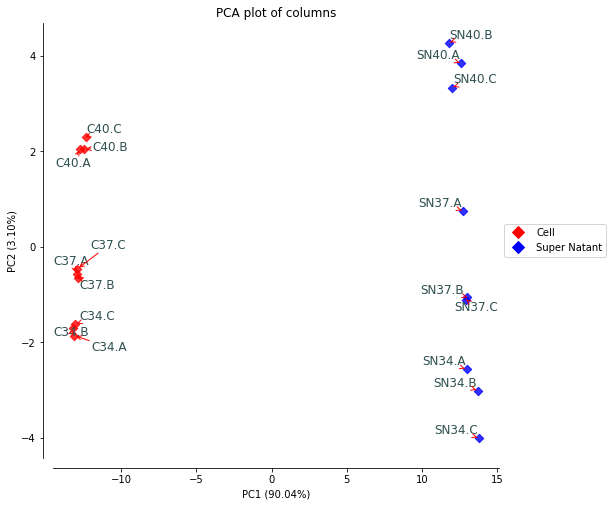

In [ ]:
colors = ['r']*9+['b']*9
color_to_label = {'r': 'Cell','b': 'Super Natant'}
plot_pca_columns(np.log2(filtered_quantification).dropna(), colors, color_to_label, figsize=(8,8))

In [ ]:
#df.loc['Tb11.v5.0144.1-p1']

In [ ]:
df = filtered_quantification.iloc[:,:9]
print(df.shape)
df = df.dropna(how='all',axis=0)
print(df.shape)
df.head()

(5974, 9)
(5972, 9)


,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.460791e+06,3.810393e+06,4.009223e+06,3.505683e+06,3.678053e+06,3.983619e+06,3.271707e+06,3.208439e+06,3.306425e+06
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,2.247772e+07,2.265788e+07,2.233361e+07,2.241399e+07,2.343680e+07,2.289144e+07,2.255723e+07,2.298451e+07,2.315477e+07
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,2.601601e+06,2.336794e+06,2.728087e+06,2.481725e+06,2.570691e+06,2.547186e+06,2.673220e+06,2.786441e+06,2.784873e+06
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.787307e+07,1.881219e+07,1.927476e+07,1.952715e+07,2.082256e+07,1.982378e+07,2.146064e+07,2.099155e+07,2.150586e+07
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,6.941149e+07,7.181619e+07,7.383449e+07,7.728172e+07,8.442056e+07,7.587258e+07,9.667632e+07,1.011063e+08,9.981973e+07


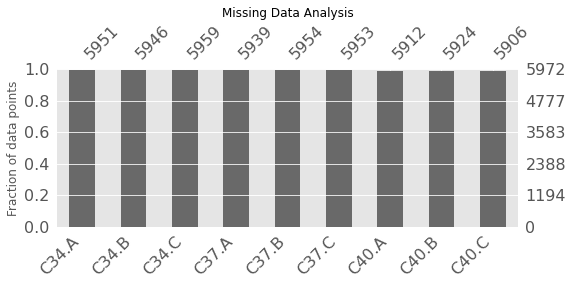

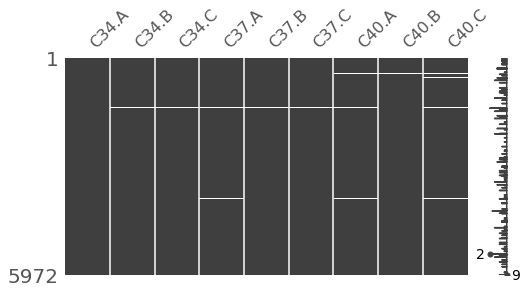

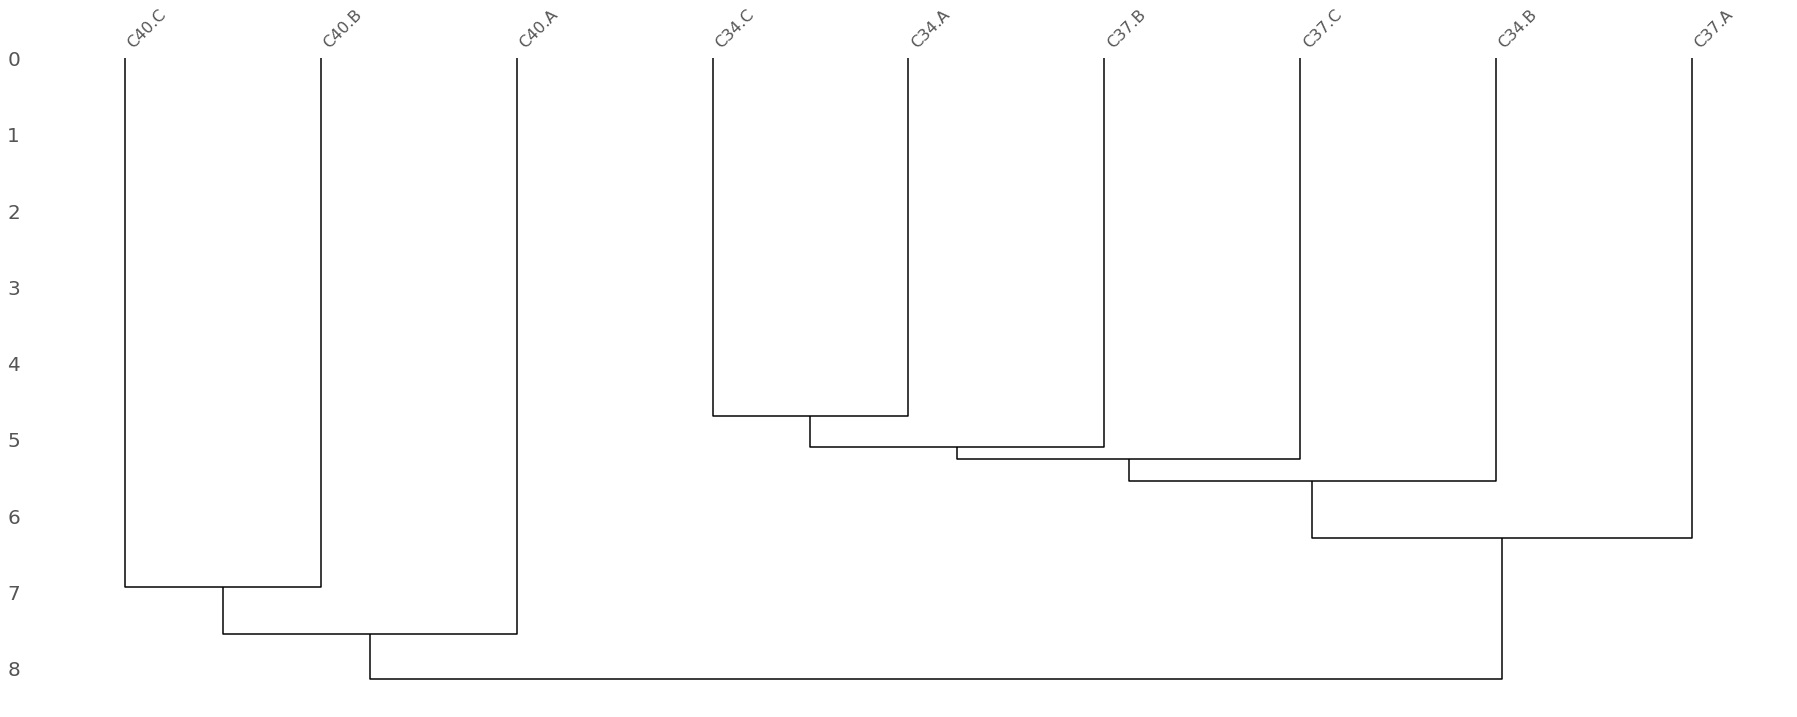

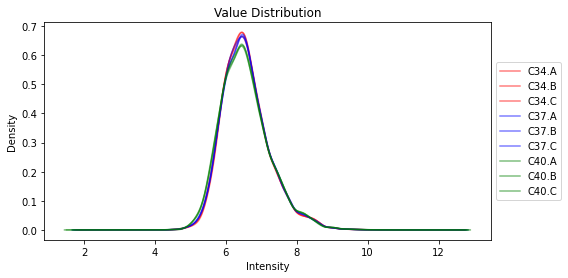

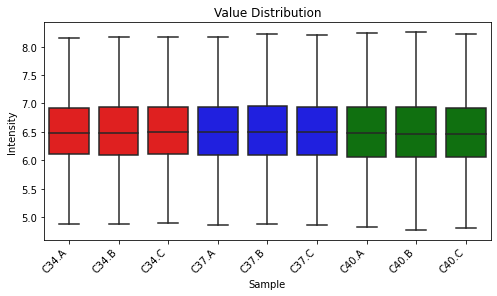

In [ ]:
dataset_viz = DatasetViz(df = df, palette = ['r']*3+['b']*3+['g']*3)
dataset_viz.analyse_missing_values(figsize=(8,4))
dataset_viz.analyse_values_distribution(figsize=(8,4))

C34.A    3.055699e+06
C34.B    3.046956e+06
C34.C    3.142917e+06
C37.A    3.099153e+06
C37.B    3.136095e+06
C37.C    3.111944e+06
C40.A    3.009498e+06
C40.B    2.936830e+06
C40.C    2.936436e+06
dtype: float64
3052836.449210626
C34.A    0.999063
C34.B    1.001930
C34.C    0.971338
C37.A    0.985055
C37.B    0.973452
C37.C    0.981006
C40.A    1.014401
C40.B    1.039501
C40.C    1.039640
dtype: float64


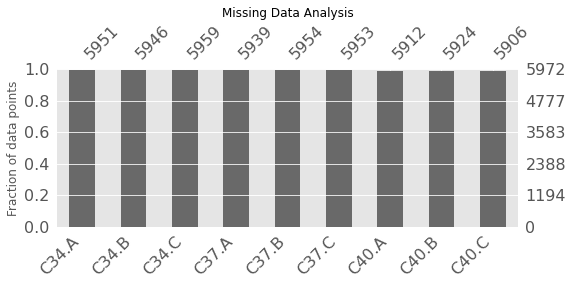

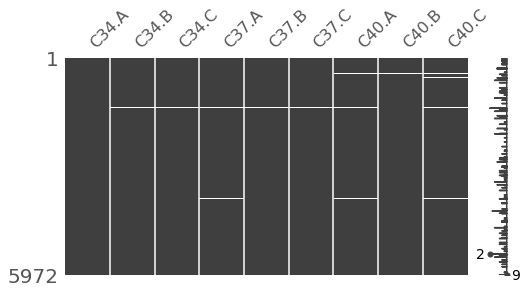

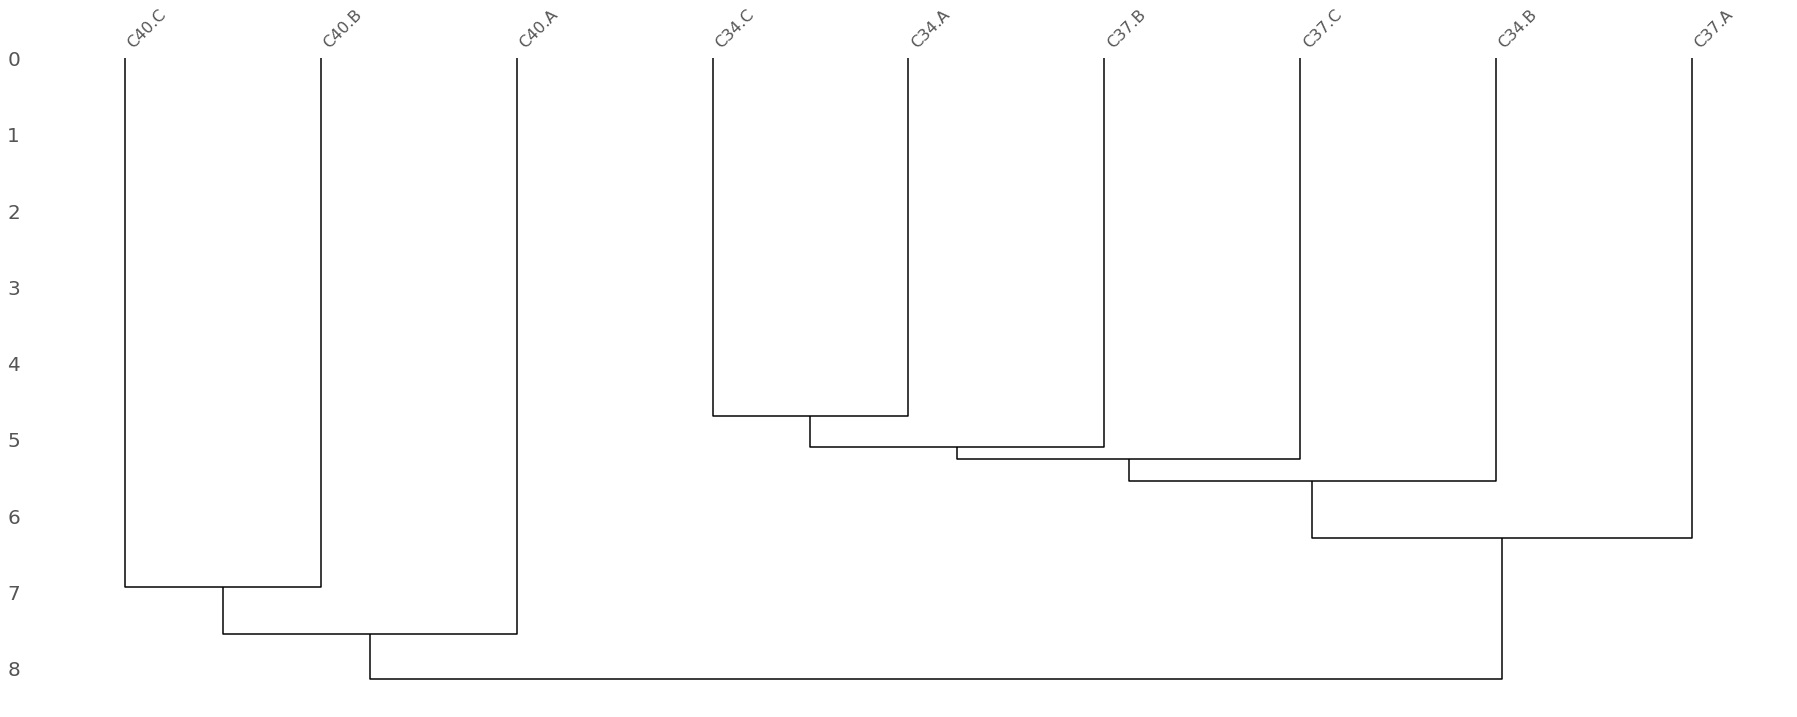

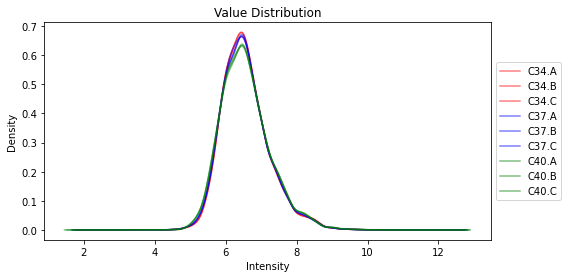

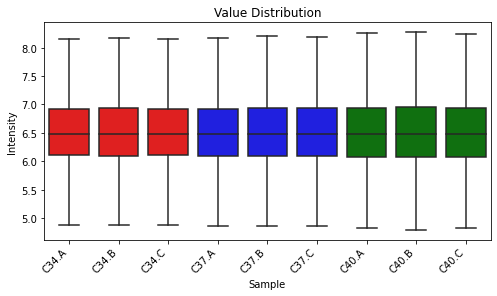

In [ ]:
df_norm_load = norm_loading(df)
dataset_viz = DatasetViz(df = df_norm_load,palette = ['r']*3+['b']*3+['g']*3)
dataset_viz.analyse_missing_values(figsize=(8,4))
dataset_viz.analyse_values_distribution(figsize=(8,4))

fill na with detection_limit: 66507.63041461774 4.822871474729528 Index(['C37.A', 'C37.B', 'C37.C'], dtype='object')
fill na with detection_limit: 67598.83582689159 4.829939216676687 Index(['C40.A', 'C40.B', 'C40.C'], dtype='object')
fill na with detection_limit: 68762.62138070726 4.837352424580979 Index(['C34.A', 'C34.B', 'C34.C'], dtype='object')
28 175


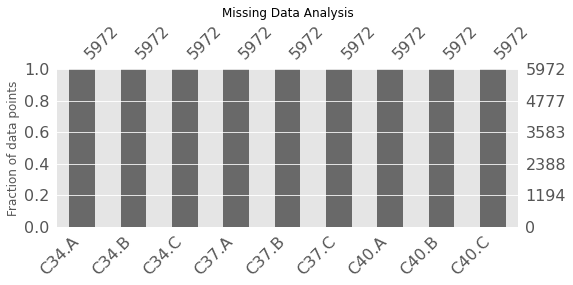

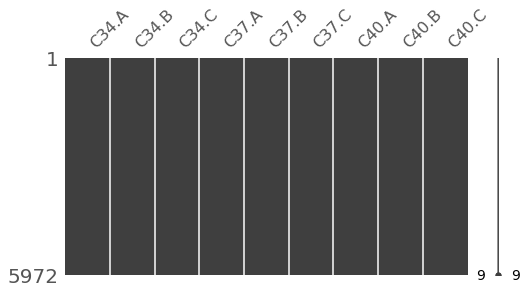

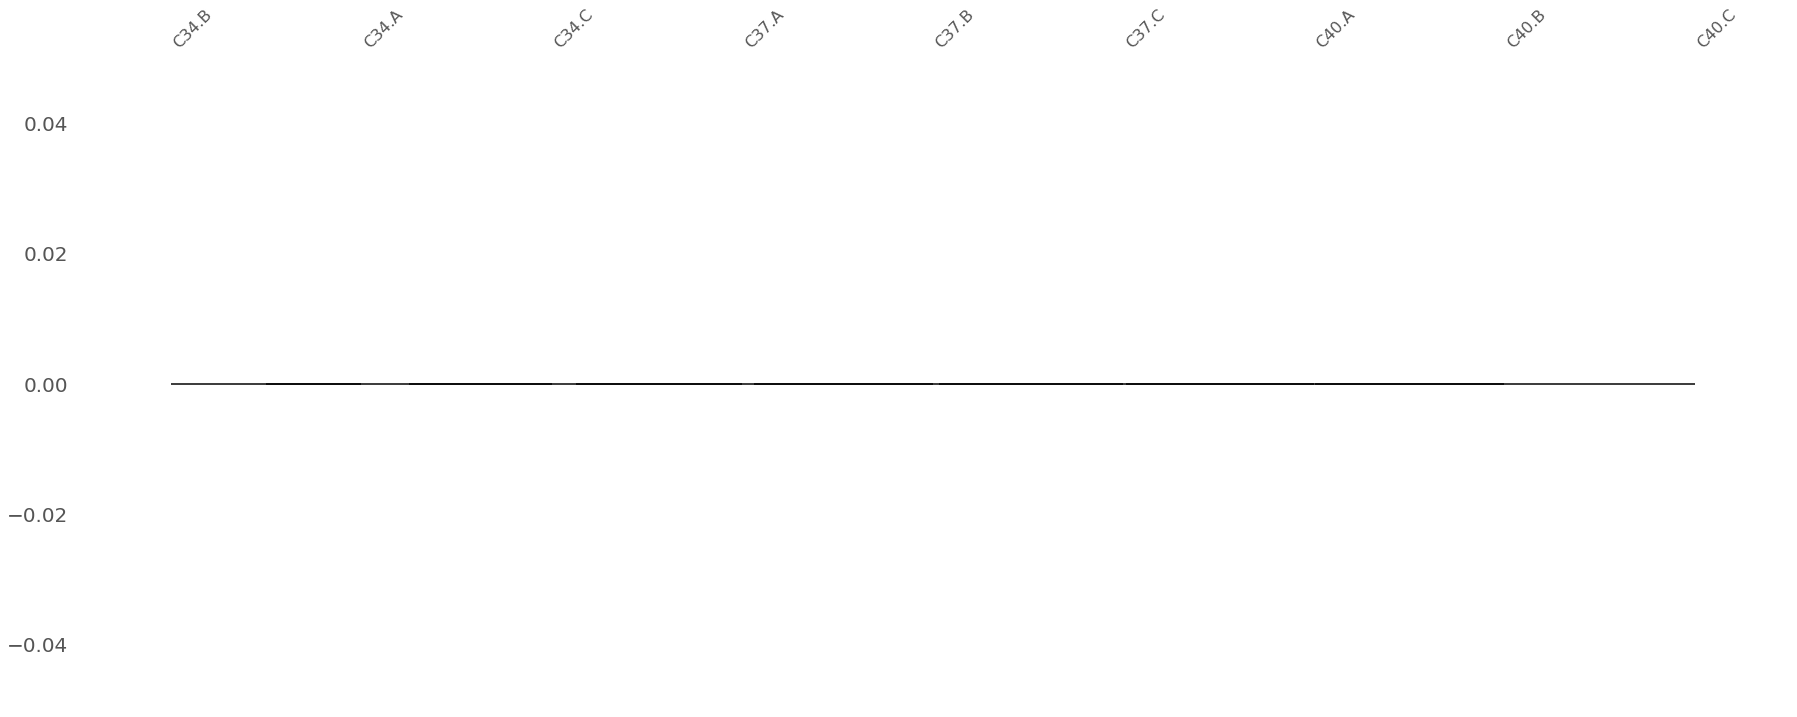

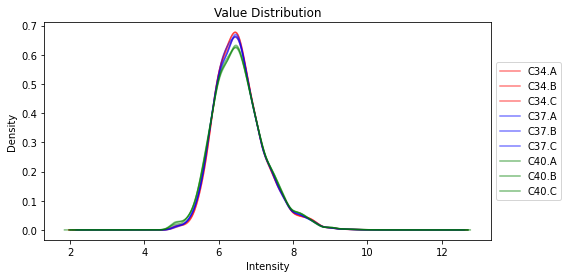

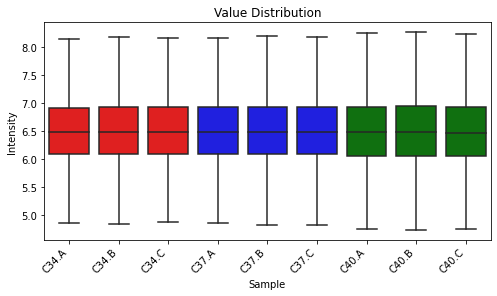

In [ ]:
df_norm_load_imputed, detection_limit_imputed_indices, iterative_imputer_imputed_indices = impute_proteomics_data(
    df_norm_load, ['A','A','A','B','B','B','C','C','C'])
dataset_viz = DatasetViz(df = df_norm_load_imputed, palette = ['r']*3+['b']*3+['g']*3)
print(len(detection_limit_imputed_indices),len(iterative_imputer_imputed_indices))
dataset_viz.analyse_missing_values(figsize=(8,4))
dataset_viz.analyse_values_distribution(figsize=(8,4))

In [ ]:
imputed_selection_normed = np.log2(df_norm_load_imputed)

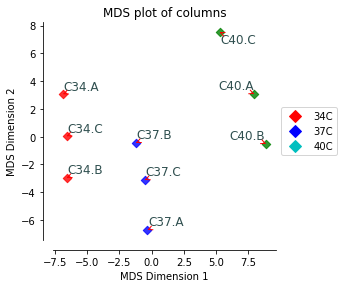

In [ ]:
colors = ['r']*3+['b']*3+['g']*3
color_to_label = {'r': '34C', 'b': '37C','c': '40C'}
plot_mds_columns(imputed_selection_normed, colors, color_to_label)

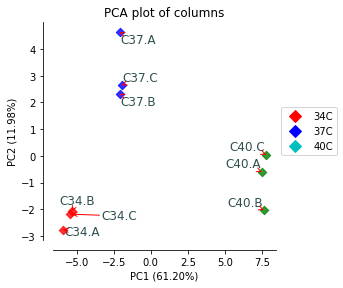

In [ ]:
plot_pca_columns(imputed_selection_normed, colors, color_to_label)

In [ ]:
%%R -i imputed_selection_normed
options(warn=-1)
library("limma")

f<- factor(
    c(
    'C34', 'C34', 'C34', 
    'C37', 'C37', 'C37', 
    'C40', 'C40','C40'),
    
    levels=c('C34','C37', 'C40'))

design<- model.matrix(~0+f)
colnames(design)<- c('C34', 'C37', 'C40')

fit2<- lmFit(imputed_selection_normed, design)
contrast.matrix<- makeContrasts("C34-C37", 
                                "C34-C40", 
                                "C37-C40",
                                levels=design)

fit2<- contrasts.fit(fit2, contrast.matrix)
fit2<- eBayes(fit2)



tt_limma_C34_C37 <- topTable(fit2, coef = 1, sort.by = "none", number = Inf)
tt_limma_C34_C40 <- topTable(fit2, coef = 2, sort.by = "none", number = Inf)
tt_limma_C37_C40 <- topTable(fit2, coef = 3, sort.by = "none", number = Inf)

In [ ]:
%R -o tt_limma_C34_C37,tt_limma_C34_C40,tt_limma_C37_C40
tt_limma_C34_C37.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,0.029777,21.768028,0.506340,0.625966,0.802776,-6.736689
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,-0.010858,24.440734,-0.323805,0.754201,0.876282,-6.818988
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,0.025700,21.315203,0.500361,0.629989,0.804425,-6.739930
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,-0.089003,24.252067,-2.552505,0.033418,0.163193,-4.225402
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,-0.126613,26.298967,-2.760258,0.024125,0.138667,-3.899256


In [ ]:
table_list = [
tt_limma_C34_C37,
tt_limma_C34_C40,
tt_limma_C37_C40]
table_names =[
'C34_C37',
'C34_C40',
'C37_C40']
len(table_names)==len(table_list)

True

In [ ]:
[n for n in tt_limma_C34_C37.index.values if 'Tb927.5.810' in n]

['Tb927.5.810:mRNA-p1']

In [ ]:
#p_index

In [ ]:
'Tb927.5.810:mRNA-p1' in detection_limit_imputed_indices, 'Tb927.5.810:mRNA-p1' in iterative_imputer_imputed_indices

(False, True)

In [ ]:
df.loc['Tb927.5.810:mRNA-p1']

C34.A    117513.878678
C34.B     66081.674297
C34.C              NaN
C37.A              NaN
C37.B    127104.767248
C37.C     91386.109182
C40.A    402404.718939
C40.B    365161.146452
C40.C    343858.988653
Name: Tb927.5.810:mRNA-p1, dtype: float64

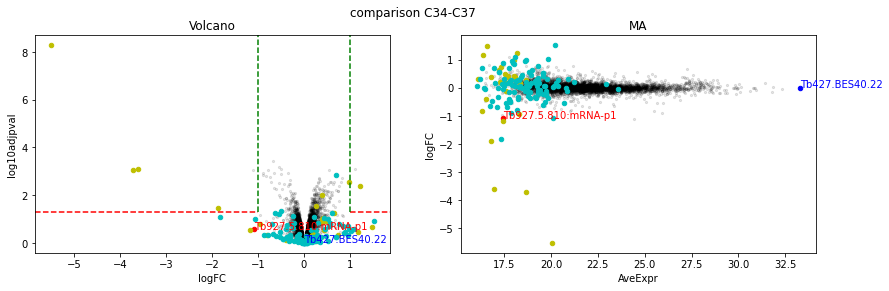

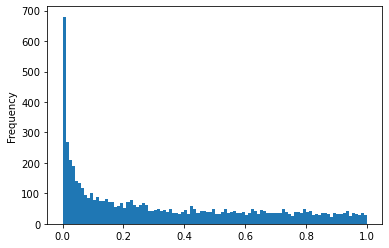

In [ ]:
#'Tb927.7.6490:mRNA-p1'
#'Target' 'b'

detection_limit_imputed_indices, iterative_imputer_imputed_indices
protein_names = ['Tb427.BES40.22','Tb927.5.810:mRNA-p1']
protein_colors=['b','r']
protein_indices = ['Tb427.BES40.22','Tb927.5.810:mRNA-p1']

for n in detection_limit_imputed_indices:
    if n not in protein_indices:
        protein_indices.append(n)
        protein_names.append('')
        protein_colors.append('y')

for n in iterative_imputer_imputed_indices:
    if n not in protein_indices:
        protein_indices.append(n)
        protein_names.append('')
        protein_colors.append('c')        
        

plot_volcano_ma(tt_limma_C34_C37, "comparison C34-C37", 
                protein_indices=protein_indices, 
                protein_names=protein_names, protein_colors=protein_colors)


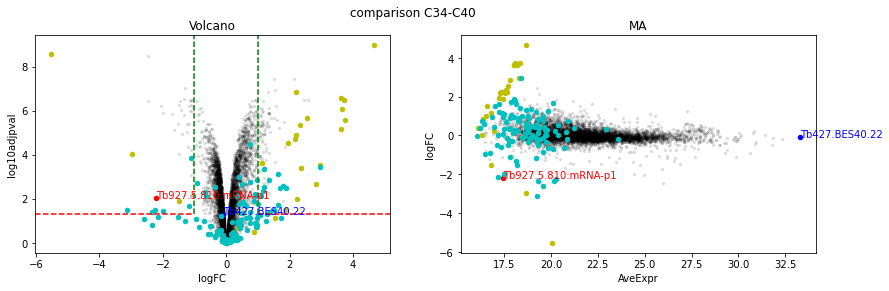

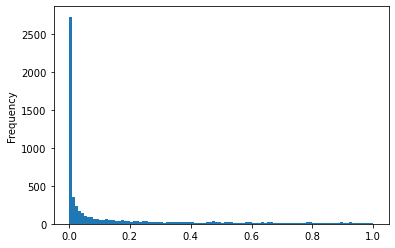

In [ ]:
#'Tb927.7.6490:mRNA-p1'
#'Target' 'b'

detection_limit_imputed_indices, iterative_imputer_imputed_indices
protein_names = ['Tb427.BES40.22','Tb927.5.810:mRNA-p1']
protein_colors=['b','r']
protein_indices = ['Tb427.BES40.22','Tb927.5.810:mRNA-p1']

for n in detection_limit_imputed_indices:
    if n not in protein_indices:
        protein_indices.append(n)
        protein_names.append('')
        protein_colors.append('y')

for n in iterative_imputer_imputed_indices:
    if n not in protein_indices:
        protein_indices.append(n)
        protein_names.append('')
        protein_colors.append('c')        
        

plot_volcano_ma(tt_limma_C34_C40, "comparison C34-C40", 
                protein_indices=protein_indices, 
                protein_names=protein_names, protein_colors=protein_colors)


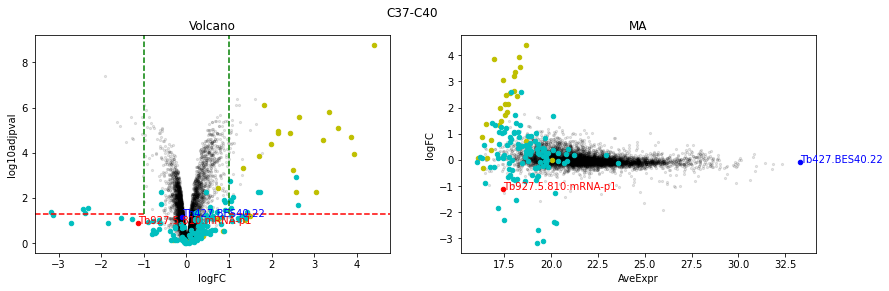

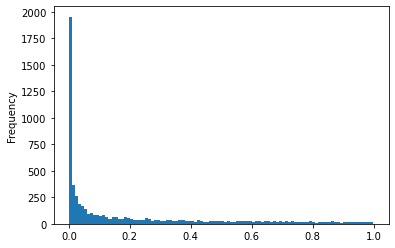

In [ ]:
#'Tb927.7.6490:mRNA-p1'
#'Target' 'b'

detection_limit_imputed_indices, iterative_imputer_imputed_indices
protein_names = ['Tb427.BES40.22','Tb927.5.810:mRNA-p1']
protein_colors=['b','r']
protein_indices = ['Tb427.BES40.22','Tb927.5.810:mRNA-p1']

for n in detection_limit_imputed_indices:
    if n not in protein_indices:
        protein_indices.append(n)
        protein_names.append('')
        protein_colors.append('y')

for n in iterative_imputer_imputed_indices:
    if n not in protein_indices:
        protein_indices.append(n)
        protein_names.append('')
        protein_colors.append('c')        
        

plot_volcano_ma(tt_limma_C37_C40, "C37-C40", 
                protein_indices=protein_indices, 
                protein_names=protein_names, protein_colors=protein_colors)


In [ ]:
for i,(t,n) in enumerate(zip(table_list,table_names)):
    table_list[i].columns = [n+'_'+c for c in table_list[i].columns]

In [ ]:
#parse_fasta_file??

In [ ]:
table_list = [filtered_quantification]+table_list
table_list[0].head()

,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C,SN34.A,SN34.B,SN34.C,SN37.A,SN37.B,SN37.C,SN40.A,SN40.B,SN40.C
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.460791e+06,3.810393e+06,4.009223e+06,3.505683e+06,3.678053e+06,3.983619e+06,3.271707e+06,3.208439e+06,3.306425e+06,3.690409e+06,4.612759e+06,5.167747e+06,2.401094e+06,3.325520e+06,3.834804e+06,3.597083e+06,1.959606e+06,NaN
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,2.247772e+07,2.265788e+07,2.233361e+07,2.241399e+07,2.343680e+07,2.289144e+07,2.255723e+07,2.298451e+07,2.315477e+07,4.198751e+07,4.355292e+07,5.033393e+07,4.432603e+07,4.487208e+07,4.846089e+07,4.149273e+07,4.047869e+07,4.421789e+07
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,2.601601e+06,2.336794e+06,2.728087e+06,2.481725e+06,2.570691e+06,2.547186e+06,2.673220e+06,2.786441e+06,2.784873e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.787307e+07,1.881219e+07,1.927476e+07,1.952715e+07,2.082256e+07,1.982378e+07,2.146064e+07,2.099155e+07,2.150586e+07,1.365396e+06,1.817139e+06,1.994927e+06,1.509358e+06,2.067789e+06,2.013277e+06,2.154750e+06,2.516216e+06,2.211981e+06
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,6.941149e+07,7.181619e+07,7.383449e+07,7.728172e+07,8.442056e+07,7.587258e+07,9.667632e+07,1.011063e+08,9.981973e+07,1.910874e+07,1.816563e+07,1.878925e+07,2.414528e+07,2.277660e+07,2.274094e+07,2.190004e+07,2.730582e+07,2.303242e+07


In [ ]:
#table_list[1]

In [ ]:
print(df.shape)
all_df = pd.concat(table_list,axis=1)
all_df.shape

(5972, 9)


(5974, 42)

In [ ]:
all_df['all_missing_in_one_condition']=[1 if n in detection_limit_imputed_indices 
                                    else 0 for n in all_df.index.values]

all_df['missing_in_one_or more sample']=[1 if n in iterative_imputer_imputed_indices 
                                    else 0 for n in all_df.index.values]

In [ ]:
prot_to_desc = parse_fasta_file('TriTrypDB-51_TbruceiTREU927_AnnotatedProteins_added_BES_GFP-BLA.fasta')

In [ ]:
def clean_id(temp_id):
    temp_id = temp_id.split(':')[0]
    temp_id = temp_id.split('.')
    temp_id = temp_id[0:3]
    return '.'.join(temp_id)


clean_id('Tb05.5K5.100:mRNA-p1')

'Tb05.5K5.100'

In [ ]:
#all_df['desc']=[prot_to_desc[clean_id(n)] for n in 
res = []
for n in all_df.index.values:
    #print(n)
    proteins = n.split(';')
    all_desc = []
    for prot in proteins :
        prot=clean_id(prot)
        desc = prot_to_desc.get(prot,'missing')
        all_desc.append(desc)
    all_desc=[n for n in all_desc]
    res.append(';'.join(all_desc))
    
all_df['desc']=res
all_df.head()

,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C,SN34.A,...,C37_C40_AveExpr,C37_C40_t,C37_C40_P.Value,C37_C40_adj.P.Val,C37_C40_B,C37_C40_log10pval,C37_C40_log10adjpval,all_missing_in_one_condition,missing_in_one_or more sample,desc
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.460791e+06,3.810393e+06,4.009223e+06,3.505683e+06,3.678053e+06,3.983619e+06,3.271707e+06,3.208439e+06,3.306425e+06,3.690409e+06,...,21.768028,1.953936,0.085629,0.154261,-5.885401,1.067380,0.811743,0,0,"hypothetical protein, conserved;hypothetical p..."
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,2.247772e+07,2.265788e+07,2.233361e+07,2.241399e+07,2.343680e+07,2.289144e+07,2.255723e+07,2.298451e+07,2.315477e+07,4.198751e+07,...,24.440734,-2.170853,0.060965,0.117825,-5.556320,1.214922,0.928761,0,0,"major vault protein, putative;major vault prot..."
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,2.601601e+06,2.336794e+06,2.728087e+06,2.481725e+06,2.570691e+06,2.547186e+06,2.673220e+06,2.786441e+06,2.784873e+06,NaN,...,21.315203,-3.718763,0.005643,0.019977,-3.112053,2.248477,1.699473,0,0,"hypothetical protein, conserved;hypothetical p..."
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.787307e+07,1.881219e+07,1.927476e+07,1.952715e+07,2.082256e+07,1.982378e+07,2.146064e+07,2.099155e+07,2.150586e+07,1.365396e+06,...,24.252067,-4.647687,0.001550,0.007853,-1.732967,2.809559,2.104953,0,0,"paraflagellar rod component par4, putative;par..."
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,6.941149e+07,7.181619e+07,7.383449e+07,7.728172e+07,8.442056e+07,7.587258e+07,9.667632e+07,1.011063e+08,9.981973e+07,1.910874e+07,...,26.298967,-8.718855,0.000020,0.000330,2.972847,4.694342,3.481703,0,0,"small GTP-binding protein, putative;ras-like s..."


In [ ]:
all_df.to_csv('all_cellular_comparisons.csv')

In [ ]:
%%R -i imputed_selection_normed
options(warn=-1)
library("limma")
library("HybridMTest")
anova_test <- row.oneway.anova(imputed_selection_normed, f)
FDR <- p.adjust(anova_test$pval, "BH")
length(FDR[FDR < 0.01])
anova_test$"BH" <-FDR
head(anova_test)

R[write to console]: Loading required package: Biobase

R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following object is masked from ‘package:limma’:

    plotMA


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


R[write to console]: Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see


                                               stat         pval          ebp
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1  2.980851 1.262045e-01 0.1300379370
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1  5.660392 4.156723e-02 0.0575305468
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1  7.683139 2.214456e-02 0.0348078744
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1 37.865814 3.956246e-04 0.0012942544
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1 73.051549 6.138179e-05 0.0003832926
Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1 35.422793 4.759891e-04 0.0013824568
                                                    BH
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1 0.1888955899
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1 0.0795639487
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1 0.0496237651
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1 0.0027251099
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1 0.0008256128
Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1 0.0030780590


In [ ]:
%R -o anova_test
print(anova_test.shape)
anova_test.head()

(5972, 4)


,stat,pval,ebp,BH
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,2.980851,0.126205,0.130038,0.188896
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,5.660392,0.041567,0.057531,0.079564
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,7.683139,0.022145,0.034808,0.049624
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,37.865814,0.000396,0.001294,0.002725
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,73.051549,0.000061,0.000383,0.000826


In [ ]:
print(anova_test.shape)
anova_test=anova_test.join(imputed_selection_normed)
print(anova_test.shape)
anova_test.sort_values('BH').head()

(5972, 4)
(5972, 13)


,stat,pval,ebp,BH,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C
Tb927.3.5790:pseudogenic_transcript-p1,inf,0.000000e+00,2.694267e-07,0.000000e+00,16.069337,16.069337,16.069337,16.021232,16.021232,16.021232,16.044711,16.044711,16.044711
Tb927.3.4130:mRNA-p1,4515.639609,2.926447e-10,3.441245e-07,8.738370e-07,20.328412,20.251317,20.391902,20.002171,20.019937,20.158887,15.694233,15.630141,15.690318
Tb927.10.2060:mRNA-p1,2867.433975,1.141619e-09,1.758475e-06,1.385833e-06,21.307989,21.298206,21.331678,21.119559,21.110131,21.127473,20.597945,20.592330,20.607119
Tb927.2.5980:mRNA-p1,3194.845619,8.256411e-10,6.951347e-07,1.385833e-06,24.970874,24.973056,24.958318,25.459859,25.506676,25.569018,27.383932,27.462031,27.442294
Tb927.10.15580:mRNA-p1,2851.965714,1.160275e-09,1.933070e-06,1.385833e-06,16.531134,16.298289,16.272125,21.852439,21.972227,21.827602,21.991263,21.847131,21.875685


In [ ]:
#all_df['desc']=[prot_to_desc[clean_id(n)] for n in 
res = []
for n in anova_test.index.values:
    #print(n)
    proteins = n.split(';')
    all_desc = []
    for prot in proteins :
        prot=clean_id(prot)
        desc = prot_to_desc.get(prot,'missing')
        all_desc.append(desc)
    all_desc=[n for n in all_desc]
    res.append(';'.join(all_desc))
    
anova_test['desc']=res
anova_test.sort_values('BH').head()

,stat,pval,ebp,BH,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C,desc
Tb927.3.5790:pseudogenic_transcript-p1,inf,0.000000e+00,2.694267e-07,0.000000e+00,16.069337,16.069337,16.069337,16.021232,16.021232,16.021232,16.044711,16.044711,16.044711,expression site-associated gene 9 (ESAG9) (pse...
Tb927.3.4130:mRNA-p1,4515.639609,2.926447e-10,3.441245e-07,8.738370e-07,20.328412,20.251317,20.391902,20.002171,20.019937,20.158887,15.694233,15.630141,15.690318,"hypothetical protein, conserved"
Tb927.10.2060:mRNA-p1,2867.433975,1.141619e-09,1.758475e-06,1.385833e-06,21.307989,21.298206,21.331678,21.119559,21.110131,21.127473,20.597945,20.592330,20.607119,"hypothetical protein, conserved"
Tb927.2.5980:mRNA-p1,3194.845619,8.256411e-10,6.951347e-07,1.385833e-06,24.970874,24.973056,24.958318,25.459859,25.506676,25.569018,27.383932,27.462031,27.442294,"chaperone protein ClpB1, putative"
Tb927.10.15580:mRNA-p1,2851.965714,1.160275e-09,1.933070e-06,1.385833e-06,16.531134,16.298289,16.272125,21.852439,21.972227,21.827602,21.991263,21.847131,21.875685,"dynein light chain, putative"


In [ ]:
anova_test.to_csv('anova_test_cell_927.csv')

In [ ]:
clustering = anova_test[anova_test['BH']<0.01].iloc[:,4:13]
print(clustering.shape)
clustering.head()

(1516, 9)


,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,24.089931,24.167946,24.158255,24.197255,24.272825,24.213063,24.375817,24.379196,24.414311
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,26.047319,26.100587,26.095838,26.181900,26.292272,26.149409,26.547287,26.647189,26.628906
Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1,20.997950,20.933863,21.041550,21.063244,21.008594,21.027633,21.224059,21.298621,21.246584
Tb05.5K5.30:mRNA-p1;Tb927.5.4380:mRNA-p1,24.090801,24.101265,24.008550,24.040286,24.103661,24.074928,24.234611,24.264497,24.252355
Tb09.v4.0014:mRNA-p1;Tb09.v4.0110:mRNA-p1;Tb927.9.15850:mRNA-p1,19.800154,19.992192,19.951179,20.058213,20.084916,19.875008,20.408252,20.507248,20.426317


In [ ]:
print(clustering.shape)
clustering=clustering.divide(clustering.max(axis=1),axis=0)
print(clustering.shape)

(1516, 9)
(1516, 9)


<seaborn.matrix.ClusterGrid>

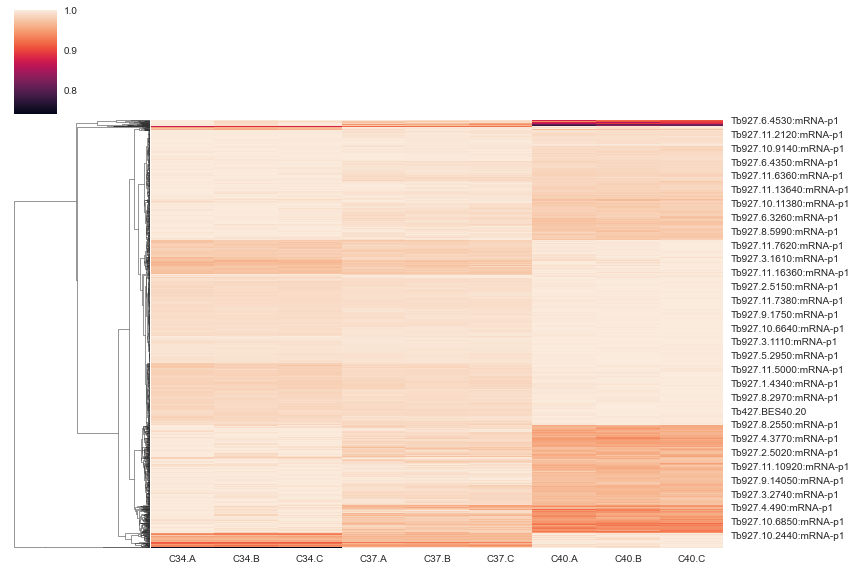

In [ ]:
import seaborn as sns
sns.clustermap(clustering,col_cluster=False,figsize=(12,8))

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(2, 12))

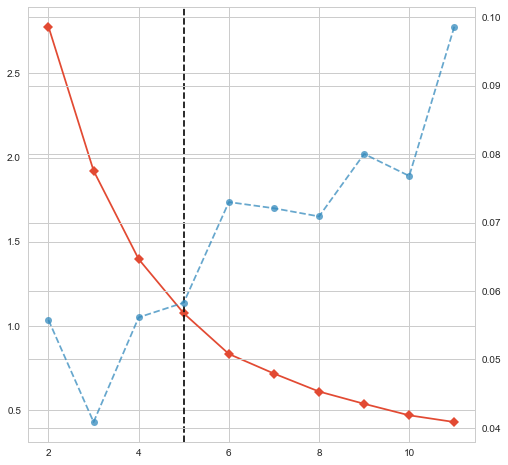

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

X = clustering.copy()
# Instantiate the clustering model and visualizer
model = KMeans()
fig, ax = plt.subplots(figsize=(8,8)) 
visualizer = KElbowVisualizer(model, k=(2,12), ax=ax)

visualizer.fit(X.values)        # Fit the data to the visualizer

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=2018).fit(X)
len(kmeans.labels_)

1516

In [ ]:
clustering['clusters']=kmeans.labels_

Cluster: 0


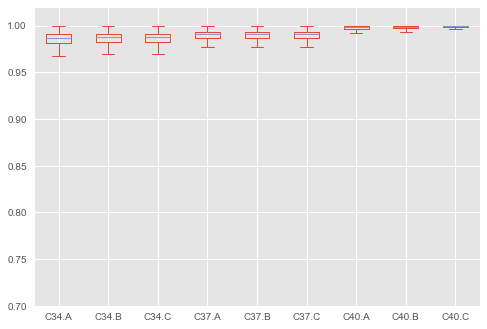

Cluster: 1


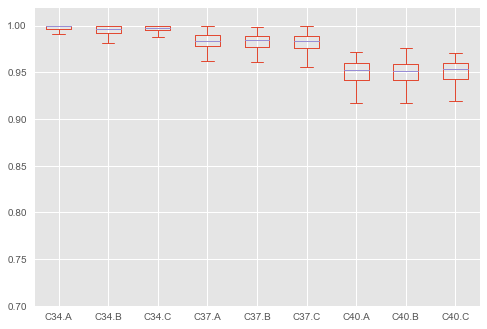

Cluster: 2


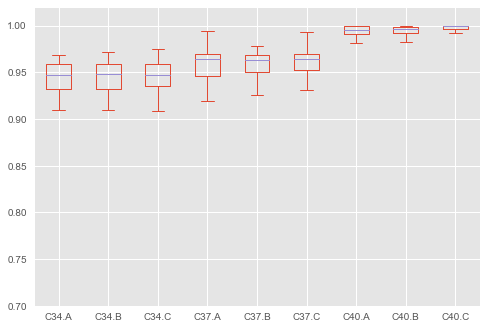

Cluster: 3


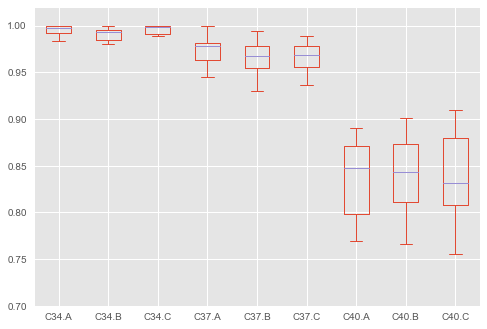

Cluster: 4


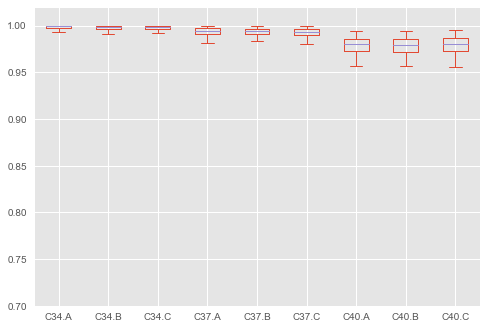

In [ ]:
plt.style.use('ggplot')
for n in range(5):
    print('Cluster:',n)
    temp = clustering[clustering['clusters']==n].iloc[:,0:9]
    temp.plot(kind='box',showfliers=False)
    plt.ylim(0.7, 1.02)
    plt.show()

In [ ]:
clustering

,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C,clusters
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,0.986714,0.989909,0.989512,0.991109,0.994205,0.991757,0.998423,0.998562,1.000000,0
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,0.977488,0.979487,0.979309,0.982539,0.986681,0.981320,0.996251,1.000000,0.999314,0
Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1,0.985883,0.982874,0.987930,0.988949,0.986383,0.987277,0.996499,1.000000,0.997557,0
Tb05.5K5.30:mRNA-p1;Tb927.5.4380:mRNA-p1,0.992842,0.993273,0.989452,0.990760,0.993372,0.992187,0.998768,1.000000,0.999500,0
Tb09.v4.0014:mRNA-p1;Tb09.v4.0110:mRNA-p1;Tb927.9.15850:mRNA-p1,0.965520,0.974884,0.972884,0.978104,0.979406,0.969170,0.995173,1.000000,0.996054,0
...,...,...,...,...,...,...,...,...,...,...
Tb927.9.9640:mRNA-p1,0.983553,0.980321,0.983672,0.990254,0.985335,0.987821,0.996179,0.994689,1.000000,0
Tb927.9.9700:mRNA-p1,1.000000,0.988753,0.998676,0.981643,0.972014,0.954937,0.860120,0.891862,0.881324,3
Tb927.9.9730:mRNA-p1,0.996392,1.000000,0.997695,0.995510,0.992722,0.990370,0.956439,0.953123,0.953288,1
Tb927.9.9780:mRNA-p1,0.959071,0.959936,0.959877,0.966211,0.969288,0.971918,0.998180,1.000000,0.999783,2


In [ ]:
clustering.to_csv('clustering_cell_927.csv')

# Analysis SN

In [ ]:
df = filtered_quantification.iloc[:,9:]
print(df.shape)
df = df.dropna(how='all',axis=0)
print(df.shape)
df.head()

(5974, 9)
(3042, 9)


,SN34.A,SN34.B,SN34.C,SN37.A,SN37.B,SN37.C,SN40.A,SN40.B,SN40.C
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.690409e+06,4.612759e+06,5.167747e+06,2.401094e+06,3.325520e+06,3.834804e+06,3.597083e+06,1.959606e+06,NaN
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,4.198751e+07,4.355292e+07,5.033393e+07,4.432603e+07,4.487208e+07,4.846089e+07,4.149273e+07,4.047869e+07,4.421789e+07
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.365396e+06,1.817139e+06,1.994927e+06,1.509358e+06,2.067789e+06,2.013277e+06,2.154750e+06,2.516216e+06,2.211981e+06
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,1.910874e+07,1.816563e+07,1.878925e+07,2.414528e+07,2.277660e+07,2.274094e+07,2.190004e+07,2.730582e+07,2.303242e+07
Tb05.5K5.200:mRNA-p1;Tb11.v5.0409.1-p1;Tb927.5.4560:mRNA-p1,6.778314e+07,7.114985e+07,7.859268e+07,7.406433e+07,7.399086e+07,7.604038e+07,6.884301e+07,6.684179e+07,6.625465e+07


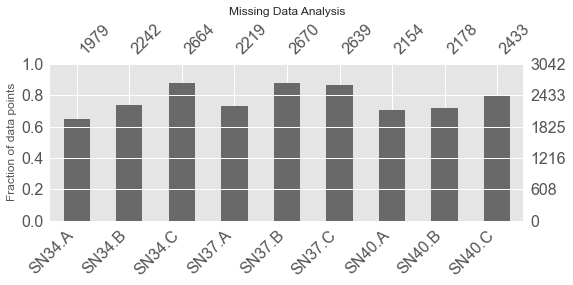

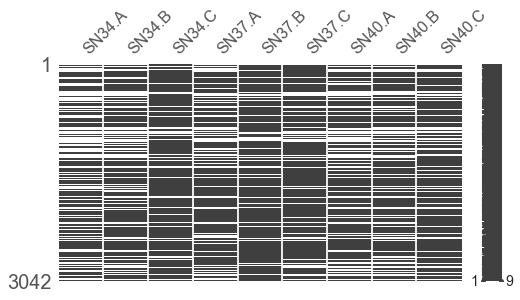

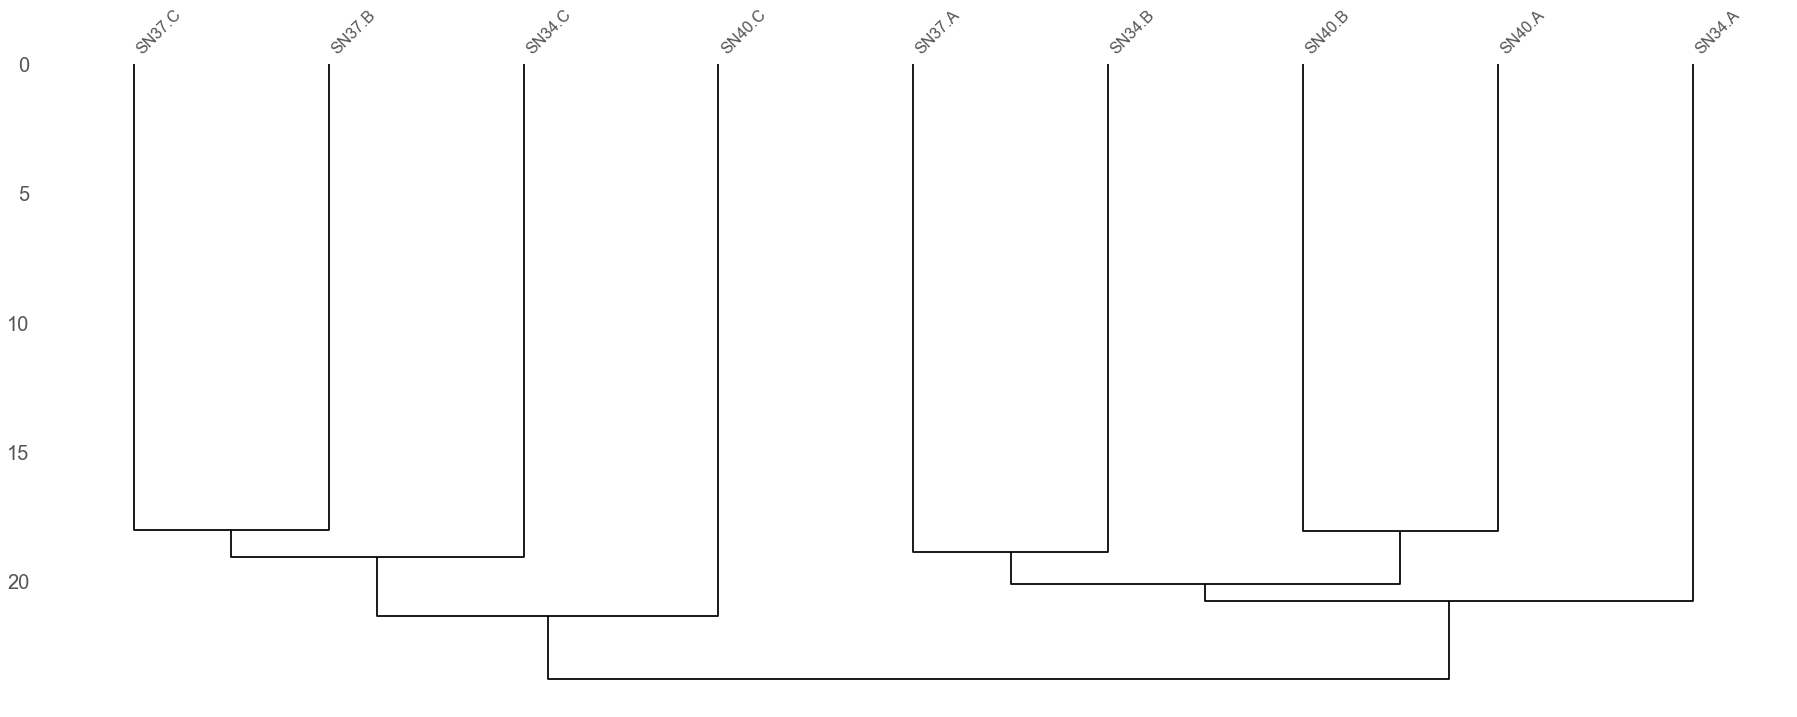

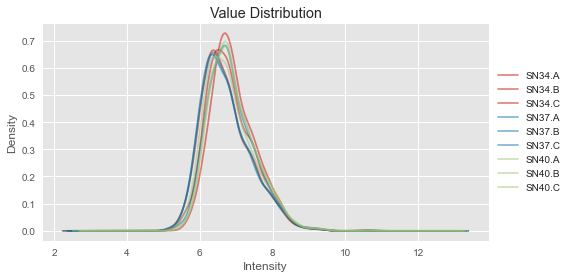

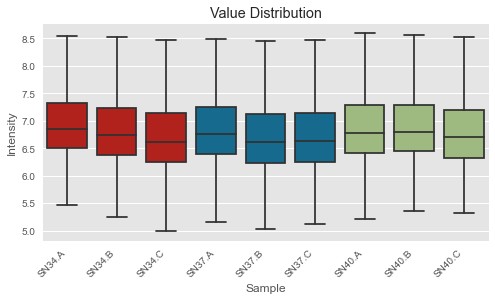

In [ ]:
dataset_viz = DatasetViz(df = df, palette = ['r']*3+['b']*3+['g']*3)
dataset_viz.analyse_missing_values(figsize=(8,4))
dataset_viz.analyse_values_distribution(figsize=(8,4))

In [ ]:
df=df.fillna(0)

In [ ]:
df.to_csv('indata_prank.txt',sep='\t')

In [ ]:
def parse_prank_out(in_folder = '', infile='prs-con1_vs_ind1_sample_dataset.dat',suffix = '_a'):
    df = pd.read_csv(os.path.join(in_folder, infile),
                       sep='\t', comment='#', index_col=[1],
                       names=['id','rank','FDR','sign'])
    df.columns = [n+suffix for n in df.columns]
    df['log_FDR'+suffix]=-np.log10(df['FDR'+suffix])
    df['log_rank'+suffix]=np.log10(df['rank'+suffix])
    df['srank'+suffix]=[n*1 if a=='+' else n*-1 for n,a in 
                         zip(df['rank'+suffix],df['sign'+suffix])]
    return df

In [ ]:
import ProtRank
data =ProtRank.load_data('indata_prank.txt', 
          separator = '\t',
          ignore_cols = [], index_col = 0, comments = '#')
print(data.shape)
data.head()

loaded input data with 3042 proteins that have been measured under 9 different conditions
(3042, 9)


,SN34.A,SN34.B,SN34.C,SN37.A,SN37.B,SN37.C,SN40.A,SN40.B,SN40.C
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.690409e+06,4.612759e+06,5.167747e+06,2.401094e+06,3.325520e+06,3.834804e+06,3.597083e+06,1.959606e+06,0.000000e+00
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,4.198751e+07,4.355292e+07,5.033393e+07,4.432603e+07,4.487208e+07,4.846089e+07,4.149273e+07,4.047869e+07,4.421789e+07
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.365396e+06,1.817139e+06,1.994927e+06,1.509358e+06,2.067789e+06,2.013277e+06,2.154750e+06,2.516216e+06,2.211981e+06
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,1.910874e+07,1.816563e+07,1.878925e+07,2.414528e+07,2.277660e+07,2.274094e+07,2.190004e+07,2.730582e+07,2.303242e+07
Tb05.5K5.200:mRNA-p1;Tb11.v5.0409.1-p1;Tb927.5.4560:mRNA-p1,6.778314e+07,7.114985e+07,7.859268e+07,7.406433e+07,7.399086e+07,7.604038e+07,6.884301e+07,6.684179e+07,6.625465e+07


In [ ]:
what_to_compare = [[[ 'SN34.A', 'SN37.A'], 
                    [ 'SN34.B', 'SN37.B' ],
                    [ 'SN34.C', 'SN37.C', ]                   
                   ]]
ProtRank.data_stats(data, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SN_34_37_sample_dataset'
significant_proteins = ProtRank.rank_proteins(
    data, what_to_compare, description, path_to='', rel_rank_ZV=0.05)


input data contain results for 3042 proteins and 9 different conditions
list of measured conditions: SN34.A, SN34.B, SN34.C, SN37.A, SN37.B, SN37.C, SN40.A, SN40.B, SN40.C
in the data, 22.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['SN34.A', 'SN37.A'], ['SN34.B', 'SN37.B'], ['SN34.C', 'SN37.C']]]
after ignoring 70 rows with only zero counts, 2972 rows remain
in the analyzed data, 19.2% of all counts are zeros
median count is 4.99e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 4.26e+05
ratio between the 90th and the 10th percentile non-zero count is 4.90e+01
statistics of irregular missing values:
  in total, there are 1277 comparisons involving a zero and a non-zero value (14.3% of all)
  out of 8916 comparisons, 120 involve a zero value and a non-zero exceeding 1.0 * median (1.3% of all)
  (the smaller the fraction, the smaller the 

In [ ]:
what_to_compare = [[[ 'SN34.A', 'SN40.A'], 
                    [ 'SN34.B', 'SN40.B' ],
                    [ 'SN34.C', 'SN40.C', ]                   
                   ]]
ProtRank.data_stats(data, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SN_34_40_sample_dataset'
significant_proteins = ProtRank.rank_proteins(
    data, what_to_compare, description, path_to='', rel_rank_ZV=0.05)


input data contain results for 3042 proteins and 9 different conditions
list of measured conditions: SN34.A, SN34.B, SN34.C, SN37.A, SN37.B, SN37.C, SN40.A, SN40.B, SN40.C
in the data, 22.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['SN34.A', 'SN40.A'], ['SN34.B', 'SN40.B'], ['SN34.C', 'SN40.C']]]
after ignoring 156 rows with only zero counts, 2886 rows remain
in the analyzed data, 21.2% of all counts are zeros
median count is 5.58e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 4.40e+05
ratio between the 90th and the 10th percentile non-zero count is 4.70e+01
statistics of irregular missing values:
  in total, there are 1364 comparisons involving a zero and a non-zero value (15.8% of all)
  out of 8658 comparisons, 136 involve a zero value and a non-zero exceeding 1.0 * median (1.6% of all)
  (the smaller the fraction, the smaller the

In [ ]:
what_to_compare = [[[ 'SN37.A', 'SN40.A'], 
                    [ 'SN37.B', 'SN40.B' ],
                    [ 'SN37.C', 'SN40.C' ]                   
                   ]]
ProtRank.data_stats(data, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SN_37_40_sample_dataset'
significant_proteins = ProtRank.rank_proteins(
    data, what_to_compare, description, path_to='', rel_rank_ZV=0.05)


input data contain results for 3042 proteins and 9 different conditions
list of measured conditions: SN34.A, SN34.B, SN34.C, SN37.A, SN37.B, SN37.C, SN40.A, SN40.B, SN40.C
in the data, 22.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['SN37.A', 'SN40.A'], ['SN37.B', 'SN40.B'], ['SN37.C', 'SN40.C']]]
after ignoring 102 rows with only zero counts, 2940 rows remain
in the analyzed data, 19.0% of all counts are zeros
median count is 5.20e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 4.06e+05
ratio between the 90th and the 10th percentile non-zero count is 5.02e+01
statistics of irregular missing values:
  in total, there are 1395 comparisons involving a zero and a non-zero value (15.8% of all)
  out of 8820 comparisons, 110 involve a zero value and a non-zero exceeding 1.0 * median (1.2% of all)
  (the smaller the fraction, the smaller the

In [ ]:
def extract_desc_from_index(index,prot_to_desc):
    res = []
    for n in index:
        #print(n)
        proteins = n.split(';')
        all_desc = []
        for prot in proteins :
            prot=clean_id(prot)
            desc = prot_to_desc.get(prot,'missing')
            all_desc.append(desc)
        all_desc=[n for n in all_desc]
        res.append(';'.join(all_desc))
    return res

In [ ]:
ProtRank_df = parse_prank_out(infile='prs-SN_34_37_sample_dataset.dat',suffix = '')
ProtRank_df.head()
log10int = data[['SN34.A', 'SN37.A', 'SN34.B', 'SN37.B', 'SN34.C', 'SN37.C']]
log10int = log10int.replace(0,np.nan)
log10int = log10int.mean(axis=1,skipna=True)
log10int = log10int.to_frame()
log10int.columns = ['log10int']
print(ProtRank_df.shape)
ProtRank_df = ProtRank_df.join(log10int,how='left')
print(ProtRank_df.shape)
ProtRank_df['desc']=extract_desc_from_index(ProtRank_df.index.values,prot_to_desc)
ProtRank_df.head()

(2972, 7)
(2972, 8)


,id,rank,FDR,sign,log_FDR,log_rank,srank,log10int,desc
Tb927.11.10330:mRNA-p1,1,110.883566,0.010,+,2.000000,2.044867,110.883566,2.320714e+06,regulator of chromosome condensation 1-like pr...
Tb927.11.2670:mRNA-p1,2,87.996766,0.055,+,1.259637,1.944467,87.996766,1.298862e+06,Nucleoporin NUP59
Tb11.v5.1055.1-p1;Tb927.3.4290:mRNA-p1;Tb927.3.4300:mRNA-p1;Tb927.3.4310:mRNA-p1;Tb927.3.4320:mRNA-p1;Tb927.3.4330:mRNA-p1,3,87.435220,0.055,+,1.259637,1.941686,87.435220,6.923376e+07,missing;Paraflagellar rod protein 1-1;Paraflag...
Tb927.3.3030:mRNA-p1,4,72.152477,0.070,-,1.154902,1.858251,-72.152477,1.591110e+07,"phosphatidylcholine transfer protein, putative"
Tb927.1.3910:mRNA-p1,5,68.629008,0.070,-,1.154902,1.836508,-68.629008,1.706547e+06,Anaphase-promoting complex subunit CDC23


In [ ]:
ProtRank_df.to_csv('ProtRank_df_SN34_SN37.csv')

In [ ]:
ProtRank_df = parse_prank_out(infile='prs-SN_34_40_sample_dataset.dat',suffix = '')
ProtRank_df.head()
log10int = data[['SN34.A', 'SN40.A', 'SN34.B', 'SN40.B', 'SN34.C', 'SN40.C']]
log10int = log10int.replace(0,np.nan)
log10int = log10int.mean(axis=1,skipna=True)
log10int = log10int.to_frame()
log10int.columns = ['log10int']
print(ProtRank_df.shape)
ProtRank_df = ProtRank_df.join(log10int,how='left')
print(ProtRank_df.shape)
ProtRank_df['desc']=extract_desc_from_index(ProtRank_df.index.values,prot_to_desc)
ProtRank_df.head()

(2886, 7)
(2886, 8)


,id,rank,FDR,sign,log_FDR,log_rank,srank,log10int,desc
Tb927.2.5980:mRNA-p1,1,251.047274,0.0000,+,inf,2.399756,251.047274,7.762657e+07,"chaperone protein ClpB1, putative"
Tb927.11.14390:mRNA-p1,2,199.175347,0.0000,-,inf,2.299236,-199.175347,4.344696e+06,"hypothetical protein, conserved"
Tb927.9.4200:mRNA-p1,3,188.041337,0.0000,-,inf,2.274253,-188.041337,5.834266e+06,fatty acyl CoA synthetase 2
Tb927.11.15480:mRNA-p1,4,145.462525,0.0025,+,2.602060,2.162751,145.462525,2.897178e+07,"heat shock protein Hsp20, putative"
Tb11.v5.1055.1-p1;Tb927.3.4290:mRNA-p1;Tb927.3.4300:mRNA-p1;Tb927.3.4310:mRNA-p1;Tb927.3.4320:mRNA-p1;Tb927.3.4330:mRNA-p1,5,113.339366,0.0060,+,2.221849,2.054381,113.339366,8.975428e+07,missing;Paraflagellar rod protein 1-1;Paraflag...


In [ ]:
ProtRank_df.to_csv('ProtRank_df_SN34_SN40.csv')

In [ ]:
ProtRank_df = parse_prank_out(infile='prs-SN_34_40_sample_dataset.dat',suffix = '')
ProtRank_df.head()
log10int = data[['SN37.A', 'SN40.A', 'SN37.B', 'SN40.B', 'SN37.C', 'SN40.C']]
log10int = log10int.replace(0,np.nan)
log10int = log10int.mean(axis=1,skipna=True)
log10int = log10int.to_frame()
log10int.columns = ['log10int']
print(ProtRank_df.shape)
ProtRank_df = ProtRank_df.join(log10int,how='left')
print(ProtRank_df.shape)
ProtRank_df['desc']=extract_desc_from_index(ProtRank_df.index.values,prot_to_desc)
ProtRank_df.head()

(2886, 7)
(2886, 8)


,id,rank,FDR,sign,log_FDR,log_rank,srank,log10int,desc
Tb927.2.5980:mRNA-p1,1,251.047274,0.0000,+,inf,2.399756,251.047274,8.132885e+07,"chaperone protein ClpB1, putative"
Tb927.11.14390:mRNA-p1,2,199.175347,0.0000,-,inf,2.299236,-199.175347,4.006085e+06,"hypothetical protein, conserved"
Tb927.9.4200:mRNA-p1,3,188.041337,0.0000,-,inf,2.274253,-188.041337,3.809080e+06,fatty acyl CoA synthetase 2
Tb927.11.15480:mRNA-p1,4,145.462525,0.0025,+,2.602060,2.162751,145.462525,3.039224e+07,"heat shock protein Hsp20, putative"
Tb11.v5.1055.1-p1;Tb927.3.4290:mRNA-p1;Tb927.3.4300:mRNA-p1;Tb927.3.4310:mRNA-p1;Tb927.3.4320:mRNA-p1;Tb927.3.4330:mRNA-p1,5,113.339366,0.0060,+,2.221849,2.054381,113.339366,1.130587e+08,missing;Paraflagellar rod protein 1-1;Paraflag...


In [ ]:
ProtRank_df.to_csv('ProtRank_df_SN37_SN40.csv')

# Analysis C vs SN 

In [ ]:
df = filtered_quantification.copy()
print(df.shape)
df = df.dropna(how='all',axis=0)
print(df.shape)
df.head()

(5974, 18)
(5974, 18)


,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C,SN34.A,SN34.B,SN34.C,SN37.A,SN37.B,SN37.C,SN40.A,SN40.B,SN40.C
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.460791e+06,3.810393e+06,4.009223e+06,3.505683e+06,3.678053e+06,3.983619e+06,3.271707e+06,3.208439e+06,3.306425e+06,3.690409e+06,4.612759e+06,5.167747e+06,2.401094e+06,3.325520e+06,3.834804e+06,3.597083e+06,1.959606e+06,NaN
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,2.247772e+07,2.265788e+07,2.233361e+07,2.241399e+07,2.343680e+07,2.289144e+07,2.255723e+07,2.298451e+07,2.315477e+07,4.198751e+07,4.355292e+07,5.033393e+07,4.432603e+07,4.487208e+07,4.846089e+07,4.149273e+07,4.047869e+07,4.421789e+07
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,2.601601e+06,2.336794e+06,2.728087e+06,2.481725e+06,2.570691e+06,2.547186e+06,2.673220e+06,2.786441e+06,2.784873e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.787307e+07,1.881219e+07,1.927476e+07,1.952715e+07,2.082256e+07,1.982378e+07,2.146064e+07,2.099155e+07,2.150586e+07,1.365396e+06,1.817139e+06,1.994927e+06,1.509358e+06,2.067789e+06,2.013277e+06,2.154750e+06,2.516216e+06,2.211981e+06
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,6.941149e+07,7.181619e+07,7.383449e+07,7.728172e+07,8.442056e+07,7.587258e+07,9.667632e+07,1.011063e+08,9.981973e+07,1.910874e+07,1.816563e+07,1.878925e+07,2.414528e+07,2.277660e+07,2.274094e+07,2.190004e+07,2.730582e+07,2.303242e+07


In [ ]:
df=df.fillna(0)

In [ ]:
df.to_csv('indata_prank.txt',sep='\t')

In [ ]:
data =ProtRank.load_data('indata_prank.txt', 
          separator = '\t',
          ignore_cols = [], index_col = 0, comments = '#')
print(data.shape)
data.head()

loaded input data with 5974 proteins that have been measured under 18 different conditions
(5974, 18)


,C34.A,C34.B,C34.C,C37.A,C37.B,C37.C,C40.A,C40.B,C40.C,SN34.A,SN34.B,SN34.C,SN37.A,SN37.B,SN37.C,SN40.A,SN40.B,SN40.C
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.460791e+06,3.810393e+06,4.009223e+06,3.505683e+06,3.678053e+06,3.983619e+06,3.271707e+06,3.208439e+06,3.306425e+06,3.690409e+06,4.612759e+06,5.167747e+06,2.401094e+06,3.325520e+06,3.834804e+06,3.597083e+06,1.959606e+06,0.000000e+00
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,2.247772e+07,2.265788e+07,2.233361e+07,2.241399e+07,2.343680e+07,2.289144e+07,2.255723e+07,2.298451e+07,2.315477e+07,4.198751e+07,4.355292e+07,5.033393e+07,4.432603e+07,4.487208e+07,4.846089e+07,4.149273e+07,4.047869e+07,4.421789e+07
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,2.601601e+06,2.336794e+06,2.728087e+06,2.481725e+06,2.570691e+06,2.547186e+06,2.673220e+06,2.786441e+06,2.784873e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1.787307e+07,1.881219e+07,1.927476e+07,1.952715e+07,2.082256e+07,1.982378e+07,2.146064e+07,2.099155e+07,2.150586e+07,1.365396e+06,1.817139e+06,1.994927e+06,1.509358e+06,2.067789e+06,2.013277e+06,2.154750e+06,2.516216e+06,2.211981e+06
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,6.941149e+07,7.181619e+07,7.383449e+07,7.728172e+07,8.442056e+07,7.587258e+07,9.667632e+07,1.011063e+08,9.981973e+07,1.910874e+07,1.816563e+07,1.878925e+07,2.414528e+07,2.277660e+07,2.274094e+07,2.190004e+07,2.730582e+07,2.303242e+07


In [ ]:
what_to_compare = [[[ 'C34.A', 'SN34.A'], 
                    [ 'C34.B', 'SN34.B' ],
                    [ 'C34.C', 'SN34.C', ]                   
                   ]]
ProtRank.data_stats(data, what_to_compare = what_to_compare, ignore_missed = True)
description = 'C_SN_34_sample_dataset'
significant_proteins = ProtRank.rank_proteins(
    data, what_to_compare, description, path_to='', rel_rank_ZV=0.05)


input data contain results for 5974 proteins and 18 different conditions
list of measured conditions: C34.A, C34.B, C34.C, C37.A, C37.B, C37.C, C40.A, C40.B, C40.C, SN34.A, SN34.B, SN34.C, SN37.A, SN37.B, SN37.C, SN40.A, SN40.B, SN40.C
in the data, 30.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['C34.A', 'SN34.A'], ['C34.B', 'SN34.B'], ['C34.C', 'SN34.C']]]
after ignoring 5 rows with only zero counts, 5969 rows remain
in the analyzed data, 30.9% of all counts are zeros
median count is 3.56e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 1.09e+06
ratio between the 90th and the 10th percentile non-zero count is 4.70e+01
statistics of irregular missing values:
  in total, there are 10979 comparisons involving a zero and a non-zero value (61.3% of all)
  out of 17907 comparisons, 2834 involve a zero value and a non-zero exceeding 1.0 * med

In [ ]:
ProtRank_df = parse_prank_out(infile='prs-C_SN_34_sample_dataset.dat',suffix = '')
ProtRank_df.head()
log10int = data[['C34.A', 'SN34.A', 'C34.B', 'SN34.B', 'C34.C', 'SN34.C']]
log10int = log10int.replace(0,np.nan)
log10int = log10int.mean(axis=1,skipna=True)
log10int = log10int.to_frame()
log10int.columns = ['log10int']
print(ProtRank_df.shape)
ProtRank_df = ProtRank_df.join(log10int,how='left')
print(ProtRank_df.shape)
ProtRank_df['desc']=extract_desc_from_index(ProtRank_df.index.values,prot_to_desc)
ProtRank_df.to_csv('ProtRank_df_C_SN_34.csv')
ProtRank_df.head()

(5969, 7)
(5969, 8)


,id,rank,FDR,sign,log_FDR,log_rank,srank,log10int,desc
Tb927.10.6990:mRNA-p1,1,597.515939,0.0,+,inf,2.776349,597.515939,5.304509e+07,"hypothetical protein, conserved"
Tb927.10.10445:mRNA-p1;Tb927.10.10460:mRNA-p1;Tb927.10.10470:mRNA-p1;Tb927.10.10480:mRNA-p1;Tb927.10.10490:mRNA-p1;Tb927.10.10500:mRNA-p1;Tb927.10.10510:mRNA-p1;Tb927.10.10520:mRNA-p1;Tb927.10.10530:mRNA-p1;Tb927.10.10540:mRNA-p1;Tb927.10.10550:mRNA-p1;Tb927.10.10560:mRNA-p1;Tb927.10.10570:mRNA-p1;Tb927.10.10580:mRNA-p1;Tb927.10.10590:mRNA-p1,2,519.441243,0.0,-,inf,2.715536,-519.441243,1.033166e+09,"Core histone H2A/H2B/H3/H4, putative;histone H..."
Tb927.4.2530:mRNA-p1,3,419.769151,0.0,-,inf,2.623011,-419.769151,1.602590e+08,"hypothetical protein, conserved"
Tb927.10.14820:mRNA-p1;Tb927.10.14830:mRNA-p1;Tb927.10.14840:mRNA-p1,4,280.683145,0.0,-,inf,2.448216,-280.683145,7.070942e+07,Mitochondrial ADP/ATP carrier protein 5c;Mitoc...
Tb927.10.1770:mRNA-p1,5,275.244746,0.0,+,inf,2.439719,275.244746,9.153338e+05,hypothetical protein


In [ ]:
what_to_compare = [[[ 'C37.A', 'SN37.A'], 
                    [ 'C37.B', 'SN37.B' ],
                    [ 'C37.C', 'SN37.C', ]                   
                   ]]
ProtRank.data_stats(data, what_to_compare = what_to_compare, ignore_missed = True)
description = 'C_SN_37_sample_dataset'
significant_proteins = ProtRank.rank_proteins(
    data, what_to_compare, description, path_to='', rel_rank_ZV=0.05)


input data contain results for 5974 proteins and 18 different conditions
list of measured conditions: C34.A, C34.B, C34.C, C37.A, C37.B, C37.C, C40.A, C40.B, C40.C, SN34.A, SN34.B, SN34.C, SN37.A, SN37.B, SN37.C, SN40.A, SN40.B, SN40.C
in the data, 30.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['C37.A', 'SN37.A'], ['C37.B', 'SN37.B'], ['C37.C', 'SN37.C']]]
after ignoring 3 rows with only zero counts, 5971 rows remain
in the analyzed data, 29.2% of all counts are zeros
median count is 3.46e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 1.50e+06
ratio between the 90th and the 10th percentile non-zero count is 4.85e+01
statistics of irregular missing values:
  in total, there are 10332 comparisons involving a zero and a non-zero value (57.7% of all)
  out of 17913 comparisons, 2616 involve a zero value and a non-zero exceeding 1.0 * med

In [ ]:
ProtRank_df = parse_prank_out(infile='prs-C_SN_37_sample_dataset.dat',suffix = '')
ProtRank_df.head()
log10int = data[['C37.A', 'SN37.A', 'C37.B', 'SN37.B', 'C37.C', 'SN37.C']]
log10int = log10int.replace(0,np.nan)
log10int = log10int.mean(axis=1,skipna=True)
log10int = log10int.to_frame()
log10int.columns = ['log10int']
print(ProtRank_df.shape)
ProtRank_df = ProtRank_df.join(log10int,how='left')
print(ProtRank_df.shape)
ProtRank_df['desc']=extract_desc_from_index(ProtRank_df.index.values,prot_to_desc)
ProtRank_df.to_csv('ProtRank_df_C_SN_37.csv')
ProtRank_df.head()

(5971, 7)
(5971, 8)


,id,rank,FDR,sign,log_FDR,log_rank,srank,log10int,desc
Tb927.10.6990:mRNA-p1,1,617.607305,0.0,+,inf,2.790712,617.607305,3.302261e+07,"hypothetical protein, conserved"
Tb927.4.2530:mRNA-p1,2,536.799541,0.0,-,inf,2.729812,-536.799541,1.591478e+08,"hypothetical protein, conserved"
Tb927.10.10445:mRNA-p1;Tb927.10.10460:mRNA-p1;Tb927.10.10470:mRNA-p1;Tb927.10.10480:mRNA-p1;Tb927.10.10490:mRNA-p1;Tb927.10.10500:mRNA-p1;Tb927.10.10510:mRNA-p1;Tb927.10.10520:mRNA-p1;Tb927.10.10530:mRNA-p1;Tb927.10.10540:mRNA-p1;Tb927.10.10550:mRNA-p1;Tb927.10.10560:mRNA-p1;Tb927.10.10570:mRNA-p1;Tb927.10.10580:mRNA-p1;Tb927.10.10590:mRNA-p1,3,379.518736,0.0,-,inf,2.579233,-379.518736,1.051168e+09,"Core histone H2A/H2B/H3/H4, putative;histone H..."
Tb927.10.1770:mRNA-p1,4,354.232650,0.0,+,inf,2.549289,354.232650,9.218350e+05,hypothetical protein
Tb927.9.10310:mRNA-p1,5,266.622987,0.0,-,inf,2.425898,-266.622987,5.385022e+07,mitochondrial carrier protein 11


In [ ]:
what_to_compare = [[[ 'C40.A', 'SN40.A'], 
                    [ 'C40.B', 'SN40.B' ],
                    [ 'C40.C', 'SN40.C', ]                   
                   ]]
ProtRank.data_stats(data, what_to_compare = what_to_compare, ignore_missed = True)
description = 'C_SN_40_sample_dataset'
significant_proteins = ProtRank.rank_proteins(
    data, what_to_compare, description, path_to='', rel_rank_ZV=0.05)


input data contain results for 5974 proteins and 18 different conditions
list of measured conditions: C34.A, C34.B, C34.C, C37.A, C37.B, C37.C, C40.A, C40.B, C40.C, SN34.A, SN34.B, SN34.C, SN37.A, SN37.B, SN37.C, SN40.A, SN40.B, SN40.C
in the data, 30.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['C40.A', 'SN40.A'], ['C40.B', 'SN40.B'], ['C40.C', 'SN40.C']]]
after ignoring 22 rows with only zero counts, 5952 rows remain
in the analyzed data, 31.4% of all counts are zeros
median count is 3.58e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 2.14e+06
ratio between the 90th and the 10th percentile non-zero count is 5.59e+01
statistics of irregular missing values:
  in total, there are 10991 comparisons involving a zero and a non-zero value (61.6% of all)
  out of 17856 comparisons, 2616 involve a zero value and a non-zero exceeding 1.0 * me

In [ ]:
ProtRank_df = parse_prank_out(infile='prs-C_SN_40_sample_dataset.dat',suffix = '')
ProtRank_df.head()
log10int = data[['C40.A', 'SN40.A', 'C40.B', 'SN40.B', 'C40.C', 'SN40.C']]
log10int = log10int.replace(0,np.nan)
log10int = log10int.mean(axis=1,skipna=True)
log10int = log10int.to_frame()
log10int.columns = ['log10int']
print(ProtRank_df.shape)
ProtRank_df = ProtRank_df.join(log10int,how='left')
print(ProtRank_df.shape)
ProtRank_df['desc']=extract_desc_from_index(ProtRank_df.index.values,prot_to_desc)
ProtRank_df.to_csv('ProtRank_df_C_SN_40.csv')
ProtRank_df.head()

(5952, 7)
(5952, 8)


,id,rank,FDR,sign,log_FDR,log_rank,srank,log10int,desc
Tb927.10.6990:mRNA-p1,1,517.066516,0.0,+,inf,2.713546,517.066516,4.298883e+07,"hypothetical protein, conserved"
Tb927.4.2530:mRNA-p1,2,456.884829,0.0,-,inf,2.659807,-456.884829,1.624806e+08,"hypothetical protein, conserved"
Tb927.10.10445:mRNA-p1;Tb927.10.10460:mRNA-p1;Tb927.10.10470:mRNA-p1;Tb927.10.10480:mRNA-p1;Tb927.10.10490:mRNA-p1;Tb927.10.10500:mRNA-p1;Tb927.10.10510:mRNA-p1;Tb927.10.10520:mRNA-p1;Tb927.10.10530:mRNA-p1;Tb927.10.10540:mRNA-p1;Tb927.10.10550:mRNA-p1;Tb927.10.10560:mRNA-p1;Tb927.10.10570:mRNA-p1;Tb927.10.10580:mRNA-p1;Tb927.10.10590:mRNA-p1,3,450.057638,0.0,-,inf,2.653268,-450.057638,8.490888e+08,"Core histone H2A/H2B/H3/H4, putative;histone H..."
Tb927.8.2350:mRNA-p1,4,247.447850,0.0,+,inf,2.393484,247.447850,2.676702e+07,"hypothetical protein, conserved"
Tb927.10.1770:mRNA-p1,5,244.245972,0.0,+,inf,2.387827,244.245972,1.155012e+06,hypothetical protein


<AxesSubplot:>

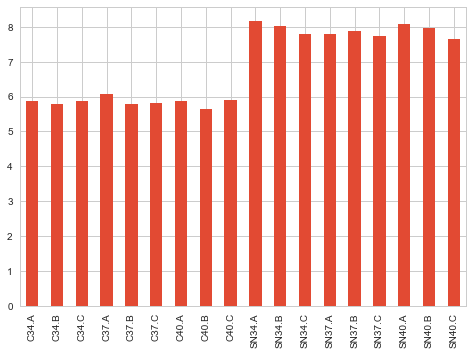

In [ ]:
np.log10(df.loc['Tb927.10.6990:mRNA-p1']).plot(kind='bar')

<AxesSubplot:>

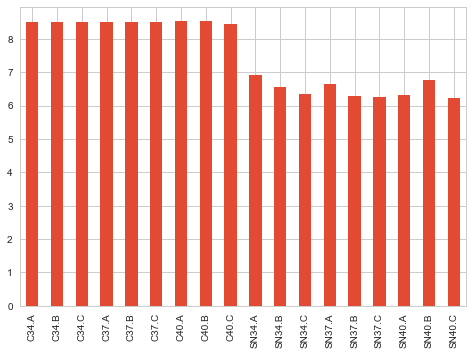

In [ ]:
np.log10(df.loc['Tb927.4.2530:mRNA-p1']).plot(kind='bar')

<AxesSubplot:>

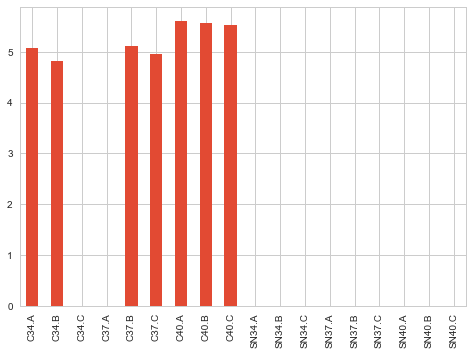

In [ ]:
np.log10(df.loc['Tb927.5.810:mRNA-p1']).plot(kind='bar')